In [1]:
"""
Vanilla Neurall Networks 가 가장 기본적인 신경망(one to one구조 입력 - 히든 - 출력)
일반적인 신경망
relu
마지막에 sigmoid, softmax


RNN(가장기본적인베이스, 구조/특징 이해필요, 성능은별로라잘안씀)
RNN에서 많이 사용되는 활성함수 - Tanh
자연어처리에서 많이사용
시간개념이 가미된 학습법
RNN은 히든계층에서 바로 출력 계층으로 가는것이 아니라 히든계층의 다음 셀로 넘어가고 그 셀들을
모두 넘어가 뒤에 출력계층으로 넘어간다.
딥러닝은 주로 예측모델을 만들 때 사용이 되어진다
순환 신경망은 이전 셀에서 출력되어진 값이 다음 셀에서도 출력이 되어지는 구조
one to many구조: 입력하나(사진하나) - 여러개 출력되어진다(설명글이 여러개)
                 Image Captioning에서 많이사용,
many to one구조: 입력이 여러개(영화참재밌었다 등등) - 출력이 하나(긍정)
                 Sentiment Classification
                 sequence of words->sentiment
                 (ex.감성분류)긍정/부정, 합/불 등 이진분류에서 많이사용 sigmoid
many to many구조: 여러개입력 - 여러개출력  (ex.번역기)
Machine Translation(기계번역)
seq of words -> seq of words
모든입력을 전달받은 다양한 셀들이 출력 여러개
Video classification on frame level(비디오분류)

input layer: 입력데이터의 값은 우리가 정하는게 아니다,데이터로부터 주어지는것 Vocabulary ex) [h,e,l.o]
hidden layer: 히든레이어의 차원은 우리가 정해준다
output layer
RNN의 단점: 긴 sequence에서는 충분한 기억을 가지고 있지 못하기 때문에 (데이터가손실된다) 엉뚱한 답을 출력할 수있다

LSTM구조
LSTM의 핵심 cell state는 모든 셀들에 연결되어져 있는 선 컨베이어 벨트와 유사
LSTM이 가지고 있는 대표적인 gate들은 필요한 정보를 저장하고 필요하지 않는 정보는 제거하는 등
상황에 맞춰 선택적으로 정보를 전달한다

입력 게이트(input gate layer) - 어떤 새로운 정보를 셀 스테이트로 저장을 할 것인가를 결정 할 수 있는 게이트
현재 셀에 입력되는 새로운 정보를 어느정도 지정을 할 것인가를 지정하는 게이트
LSTM은 RNN의 발전된 형태
LSTM은 시계열 데이터에서 상당히 효과적인 데이터를 도출해낸다
자연어 처리에서 많이 사용
"""

'\nVanilla Neurall Networks 가 가장 기본적인 신경망(one to one구조 입력 - 히든 - 출력)\n일반적인 신경망\nrelu\n마지막에 sigmoid, softmax\n\n\nRNN(가장기본적인베이스, 구조/특징 이해필요, 성능은별로라잘안씀)\nRNN에서 많이 사용되는 활성함수 - Tanh\n자연어처리에서 많이사용\n시간개념이 가미된 학습법\nRNN은 히든계층에서 바로 출력 계층으로 가는것이 아니라 히든계층의 다음 셀로 넘어가고 그 셀들을\n모두 넘어가 뒤에 출력계층으로 넘어간다.\n딥러닝은 주로 예측모델을 만들 때 사용이 되어진다\n순환 신경망은 이전 셀에서 출력되어진 값이 다음 셀에서도 출력이 되어지는 구조\none to many구조: 입력하나(사진하나) - 여러개 출력되어진다(설명글이 여러개)\n                 Image Captioning에서 많이사용,\nmany to one구조: 입력이 여러개(영화참재밌었다 등등) - 출력이 하나(긍정)\n                 Sentiment Classification\n                 sequence of words->sentiment\n                 (ex.감성분류)긍정/부정, 합/불 등 이진분류에서 많이사용 sigmoid\nmany to many구조: 여러개입력 - 여러개출력  (ex.번역기)\nMachine Translation(기계번역)\nseq of words -> seq of words\n모든입력을 전달받은 다양한 셀들이 출력 여러개\nVideo classification on frame level(비디오분류)\n\ninput layer: 입력데이터의 값은 우리가 정하는게 아니다,데이터로부터 주어지는것 Vocabulary ex) [h,e,l.o]\nhidden layer: 히든레이어의 차원은 우리가 정해준다\noutput layer\nRNN의 단점: 긴 sequence에서는 충분한 기억을 가지고 있지 못하기 때문에 (데이터가

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#pip install finance-datareader

In [4]:
import FinanceDataReader as fdr

In [5]:
kakao=fdr.DataReader('035720') #kakao

In [6]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [7]:
apple=fdr.DataReader('AAPL', '1981-01-01', '1982-10-31')#기간을 줄수도 있다
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1982-10-25,0.115513,0.116071,0.108259,0.108817,0.084316,184934400
1982-10-26,0.108817,0.109933,0.103795,0.109375,0.084748,167753600
1982-10-27,0.109375,0.112723,0.109375,0.112165,0.086910,191161600


In [8]:
# https://github.com/FinanceData/FinanceDataReader 참고주소

In [9]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [10]:
kakao.index

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', name='Date', length=5921, freq=None)

In [11]:
kakao['year']=kakao.index.year
kakao['month']=kakao.index.month
kakao['day']=kakao.index.day

In [12]:
kakao

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1999-11-11,999,999,999,999,12,NaN,1999,11,11
1999-11-12,1115,1115,1115,1115,140,0.116116,1999,11,12
1999-11-15,1249,1249,1249,1249,405,0.120179,1999,11,15
1999-11-16,1396,1396,1396,1396,214,0.117694,1999,11,16
1999-11-17,1561,1561,1561,1561,191,0.118195,1999,11,17
...,...,...,...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291,2023,11,1
2023-11-02,38000,38600,37900,38550,1529650,0.025266,2023,11,2
2023-11-03,39250,41550,38900,41300,3675484,0.071336,2023,11,3


Text(0, 0.5, 'price')

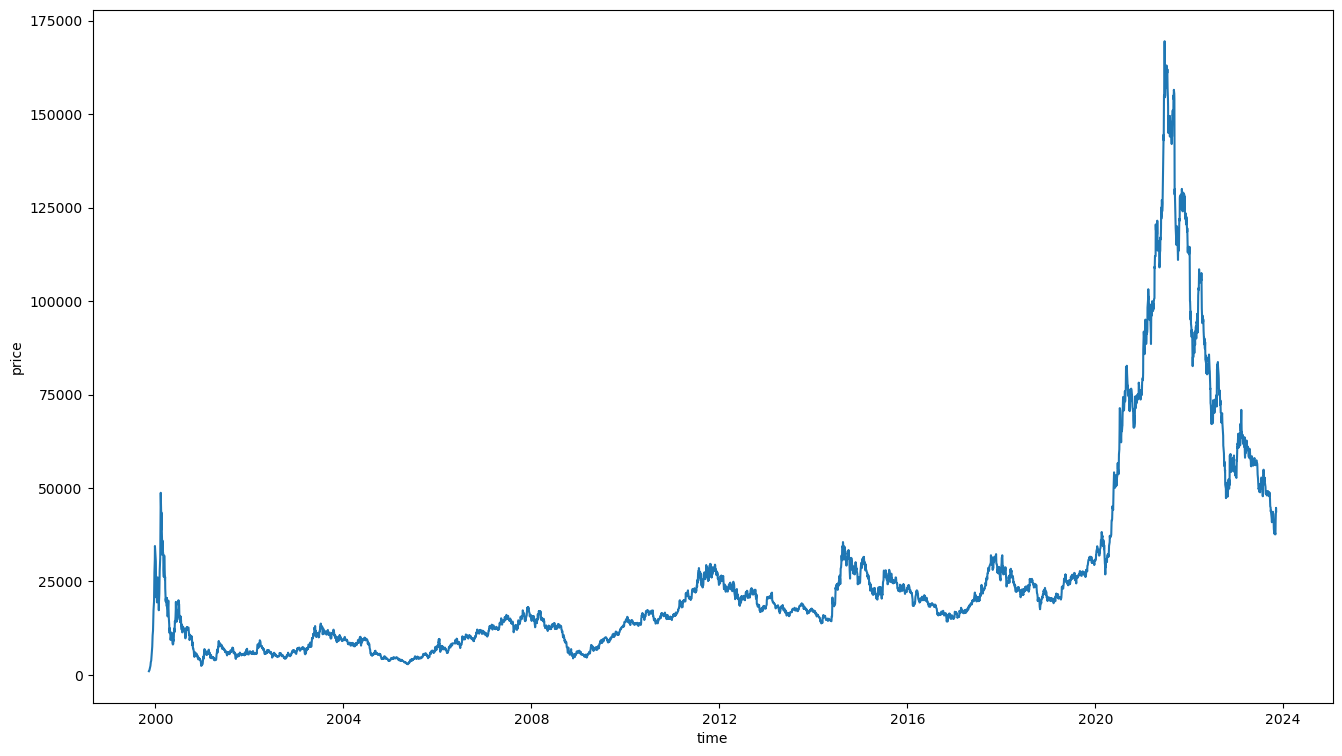

In [13]:
plt.figure(figsize=(16,9))
sns.lineplot(x=kakao.index, y=kakao['Close'])
plt.xlabel('time')
plt.ylabel('price')

In [14]:
ts = [['2000', '2010'],
      ['2010', '2015'],
      ['2015', '2020'],
      ['2020', '2023']]

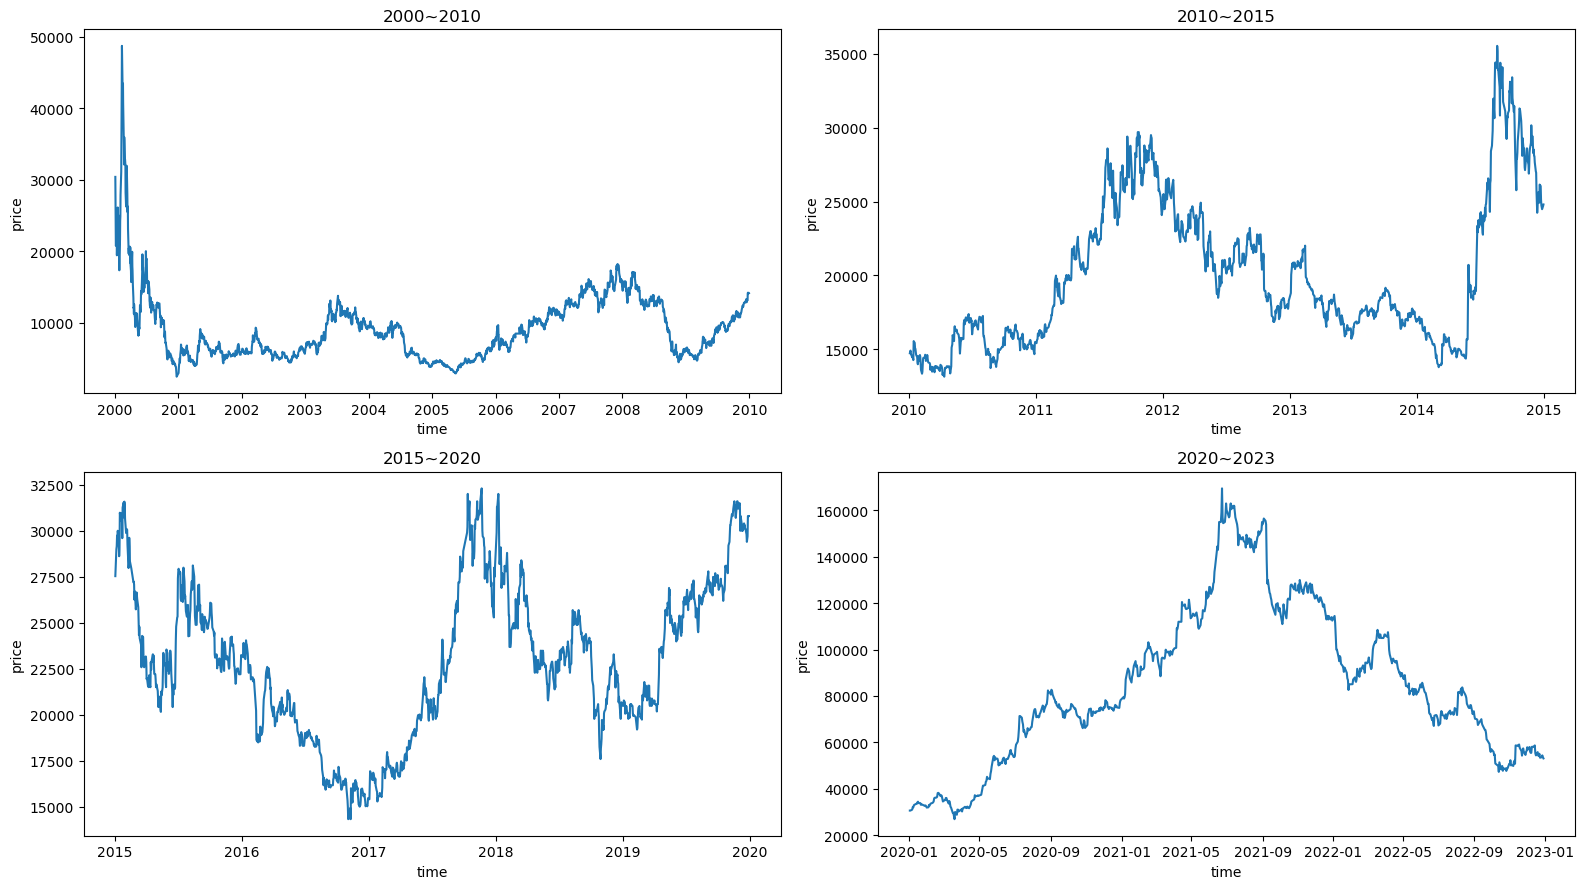

In [15]:
fig,axes=plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout() #그래프간의 간격을 조금 늘려줌(가독성좋아짐)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [19]:
scaled=scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.58381503e-01, 2.62732919e-01, 2.59351577e-01,
        2.57792688e-01],
       [2.59883721e-01, 2.58670520e-01, 2.66149068e-01, 2.53713628e-01,
        1.06856427e-01]])

In [20]:
df = pd.DataFrame(scaled, columns=cols)

In [21]:
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )

C:\Users\user\AppData\Local\Temp\ipykernel_10616\3045550222.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )


In [24]:
xtrain.shape

(4736, 4)

In [25]:
xtest.shape

(1185, 4)

In [26]:
ytrain.shape

(4736,)

In [27]:
# 임베딩은 자연어처리쪽에서 사용, 수치데이터에서 사용하지않음

In [28]:
#RNN

In [29]:
# train data : 4736건
# test data : 1185건

In [30]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): #4736-20 = 4716 => i = 0, 4715
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [31]:
# make_dataset(xtrain, ytrain, 20)
xtrain, ytrain = make_dataset(xtrain, ytrain, 20)

In [99]:
xtrain.shape  #(4716,20,4)   timestep20, 4차원
xtrain

array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
        [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        ...,
        [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]],

       [[6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        [8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05],
        ...,
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05],
        [5.49883721e-02, 5.46705202e-02, 5.87453416e-02, 1.60358628e-05]],

       [[7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        

In [100]:
xtrain.shape

(4716, 20, 4)

In [101]:
ytrain.shape
ytrain=ytrain.reshape(ytrain.shape[0],1)

In [102]:
ytrain.shape

(4716, 1)

In [106]:
xtest.shape

(1185, 4)

In [107]:
ytest.shape

(1185,)

In [108]:
xtest, ytest = make_dataset(xtest, ytest, 20)

In [109]:
xtest.shape #(1165, 20, 4)

(1165, 20, 4)

In [112]:
ytest=ytest.reshape(ytest.shape[0],1)

In [113]:
ytest.shape

(1165, 1)

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [115]:
model = Sequential()

In [116]:
model.add(LSTM(16, 
               input_shape=(xtrain.shape[1],xtrain.shape[2]), 
               activation='relu', return_sequences=False)) 
#LSTM(hidden unit,input_shape=())

In [117]:
model.add(Dense(1)) #activation = linear가 디폴트값이다, 
# 분류하는 경우에 시그모이드나 소프트맥스함수 사용
# 이것은 분류가아니라 주가 예측하는 경우이므로 linear

In [118]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [119]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [120]:
history = model.fit(xtrain, ytrain, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
231/236 [============================>.] - ETA: 0s - loss: 3.7208e-04
Epoch 1: val_loss improved from inf to 0.00005, saving model to tmp_checkpoint.h5
236/236 [==============================] - 2s 5ms/step - loss: 3.6572e-04 - val_loss: 5.2925e-05
Epoch 2/200
 42/236 [====>.........................] - ETA: 0s - loss: 2.9064e-05

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


228/236 [===========================>..] - ETA: 0s - loss: 3.9648e-05
Epoch 2: val_loss improved from 0.00005 to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 4.0117e-05 - val_loss: 4.3171e-05
Epoch 3/200
231/236 [============================>.] - ETA: 0s - loss: 3.6332e-05
Epoch 3: val_loss did not improve from 0.00004
236/236 [==============================] - 1s 4ms/step - loss: 3.6376e-05 - val_loss: 5.3452e-05
Epoch 4/200
231/236 [============================>.] - ETA: 0s - loss: 3.3788e-05
Epoch 4: val_loss improved from 0.00004 to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 3.3854e-05 - val_loss: 3.6689e-05
Epoch 5/200
228/236 [===========================>..] - ETA: 0s - loss: 3.2236e-05
Epoch 5: val_loss improved from 0.00004 to 0.00003, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 3.1732e-05 - val_loss: 3.

In [121]:
model.load_weights('tmp_checkpoint.h5')

In [122]:
pred=model.predict(xtest)

37/37 [==============================] - 0s 2ms/step


In [123]:
pred

array([[0.11460634],
       [0.1142742 ],
       [0.11383857],
       ...,
       [0.2112246 ],
       [0.21903901],
       [0.2318286 ]], dtype=float32)

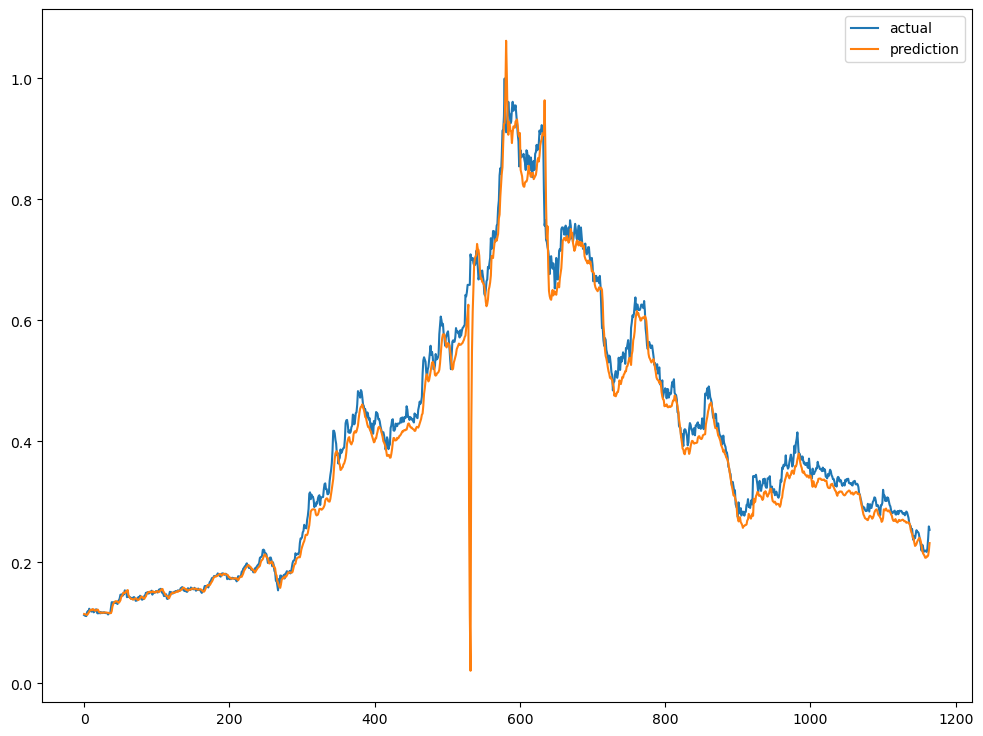

In [124]:
plt.figure(figsize=(12, 9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [125]:
pred

array([[0.11460634],
       [0.1142742 ],
       [0.11383857],
       ...,
       [0.2112246 ],
       [0.21903901],
       [0.2318286 ]], dtype=float32)

In [ ]:
scaler.inverse_transform(pred)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10))) #출력이 3차원 ,timestep2, input dimension 10
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
inputs

array([[0.01980405, 0.2821663 , 0.59614977, 0.71034681],
       [0.56267235, 0.53657411, 0.57789796, 0.00482149],
       [0.94179151, 0.46400154, 0.16605308, 0.22730644],
       [0.40924875, 0.37503623, 0.74770906, 0.75106287],
       [0.37447586, 0.97546802, 0.29857069, 0.45740267],
       [0.25391629, 0.59788233, 0.69807157, 0.07683973],
       [0.07610097, 0.29238514, 0.09339288, 0.83681838],
       [0.33186058, 0.61405719, 0.54249145, 0.73321179],
       [0.0587428 , 0.57721218, 0.66475765, 0.66464448],
       [0.90860473, 0.61466786, 0.69993853, 0.4483094 ]])

In [35]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [36]:
# github.com/hunkim

In [128]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer #문장을 단어별로 자르는것
from tensorflow.keras.preprocessing.sequence import pad_sequences #채우는거
from tensorflow.keras.utils import to_categorical #원핫인코딩 해주는함수

In [129]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""


In [130]:
print(text)

경마장에 있는 말이 뛰고 있다

그의 말이 법이다

가는 말이 고와야 오는 말이 곱다



In [131]:
tokenizer = Tokenizer()

In [132]:
tokenizer.fit_on_texts([text])

In [133]:
tokenizer.index_word #fit_on_texts 하면 이런 구조로 나온다, 0번 없음

{1: '말이',
 2: '경마장에',
 3: '있는',
 4: '뛰고',
 5: '있다',
 6: '그의',
 7: '법이다',
 8: '가는',
 9: '고와야',
 10: '오는',
 11: '곱다'}

In [134]:
tokenizer.word_index #이렇게하면 단어가 키 인덱스가 벨류가 된다

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [135]:
vocab_size = len(tokenizer.word_index) + 1 #+1해준이유는 파이썬인덱스 0번부터인데 토큰화는 1번부터라서
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [136]:
sequences = list()
sequences

[]

In [137]:
text

'경마장에 있는 말이 뛰고 있다\n\n그의 말이 법이다\n\n가는 말이 고와야 오는 말이 곱다\n'

In [138]:
text.split('\n')

['경마장에 있는 말이 뛰고 있다', '', '그의 말이 법이다', '', '가는 말이 고와야 오는 말이 곱다', '']

In [139]:
tokenizer.word_index
'''
경마장에	있는
2	경마장에 있는	말이
3	경마장에 있는 말이	뛰고
4	경마장에 있는 말이 뛰고	있다
'''

'\n경마장에\t있는\n2\t경마장에 있는\t말이\n3\t경마장에 있는 말이\t뛰고\n4\t경마장에 있는 말이 뛰고\t있다\n'

In [140]:
tokenizer.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])[0]
#문장을 숫자로 변환해줘야 RNN구조에 들어가서 연산이가능

[2, 3, 1, 4, 5]

In [141]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)): # [2, 3, 1, 4, 5] -> range(1, 5)
        sequence = encoded[:i+1] #[2,3], [2, 3, 1], ...
        sequences.append(sequence) #[[2,3],[2, 3, 1],[2, 3, 1, 4], [2, 3, 1, 4, 5]]

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [142]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [143]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [144]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
#padding='pre'는 0이 앞쪽부터채워진다
#padding='post'는 0이 뒤쪽부터 채워짐

In [145]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [146]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [147]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [148]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [149]:
y = to_categorical(y, num_classes=vocab_size)

In [150]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [152]:
vocab_size #11+1=12

12

In [153]:
embedding_dim = 10 #임베딩 차원이 10차원
#임베딩? 단어를 벡터공간에 표현하는 것
#임베딩 벡터 공간: 11차원(단어의 종류 개수)
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
#12차원 데이터를 10차원 공간 데이터로 표현해라
#임베딩하는이유 
#고차원의 단어 벡터로 구성되어져 있는 단어 벡터를 저차원으로 줄여 학습속도를 개선하는 용도
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.4938 - accuracy: 0.0909 - 804ms/epoch - 804ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4798 - accuracy: 0.1818 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4661 - accuracy: 0.1818 - 2ms/epoch - 2ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4523 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4385 - accuracy: 0.1818 - 4ms/epoch - 4ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4243 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4097 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3946 - accuracy: 0.2727 - 2ms/epoch - 2ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3787 - accuracy: 0.3636 - 5ms/epoch - 5ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3621 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3446 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3261 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3066 - accuracy: 0.3636 -

Epoch 105/200
1/1 - 0s - loss: 0.8446 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 106/200
1/1 - 0s - loss: 0.8338 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 107/200
1/1 - 0s - loss: 0.8230 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 108/200
1/1 - 0s - loss: 0.8124 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 109/200
1/1 - 0s - loss: 0.8018 - accuracy: 0.7273 - 2ms/epoch - 2ms/step
Epoch 110/200
1/1 - 0s - loss: 0.7913 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 111/200
1/1 - 0s - loss: 0.7808 - accuracy: 0.7273 - 0s/epoch - 0s/step
Epoch 112/200
1/1 - 0s - loss: 0.7705 - accuracy: 0.7273 - 0s/epoch - 0s/step
Epoch 113/200
1/1 - 0s - loss: 0.7602 - accuracy: 0.7273 - 10ms/epoch - 10ms/step
Epoch 114/200
1/1 - 0s - loss: 0.7500 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 115/200
1/1 - 0s - loss: 0.7398 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 116/200
1/1 - 0s - loss: 0.7298 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 117/200
1/1 - 0s - loss: 0.7198 - ac

In [154]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') #pad_sequences 단어길이 맞춰줌
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [155]:
print(sentence_generation(model, tokenizer, '고와야', 3))

고와야 말이 말이 말이


In [65]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [66]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [67]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [68]:
print(df['headline'].isnull().values.any()) #단하나라도 결측값이있으면 True라고 나온다

False


In [69]:
headline=[]

In [70]:
headline.extend(list(df.headline.values))

In [71]:
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [72]:
print('총 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324


In [73]:
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [74]:
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafaring Past, and Muddied Its Future',
 'A Quote Disproved',
 'Hot Stuff Turns Cold',
 'At the Top,

In [75]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()
# punctuation 특수문자같은것들 제거하고 소문자로 변경 한것
preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [76]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [78]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [79]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [80]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

In [81]:
index_to_word

{1: 'the',
 2: 'a',
 3: 'to',
 4: 'of',
 5: 'in',
 6: 'for',
 7: 'and',
 8: 'is',
 9: 'on',
 10: 'with',
 11: 'trump',
 12: 'as',
 13: 'at',
 14: 'new',
 15: 'how',
 16: 'from',
 17: 'it',
 18: 'an',
 19: 'that',
 20: 'be',
 21: 'season',
 22: 'us',
 23: 'you',
 24: 'its',
 25: 'what',
 26: 'episode',
 27: 'can',
 28: 'your',
 29: 'not',
 30: 'he',
 31: 'now',
 32: 'his',
 33: 'are',
 34: 'teaching',
 35: 'war',
 36: 'out',
 37: 'no',
 38: 'was',
 39: 'by',
 40: 'trumps',
 41: 'has',
 42: 'over',
 43: 'may',
 44: 'into',
 45: 'why',
 46: 'more',
 47: 'we',
 48: 'who',
 49: 'about',
 50: 'recap',
 51: 'activities',
 52: '1',
 53: 'just',
 54: 'do',
 55: 'women',
 56: 'when',
 57: 'syria',
 58: 'trade',
 59: 'i',
 60: '2',
 61: 'or',
 62: 'will',
 63: 'this',
 64: 'have',
 65: 'president',
 66: 'but',
 67: 'home',
 68: 'up',
 69: 'long',
 70: 'one',
 71: 'off',
 72: 'facebook',
 73: 'house',
 74: 'gop',
 75: 'our',
 76: 'case',
 77: 'they',
 78: 'life',
 79: 'end',
 80: 'right',
 81: 'so

In [82]:
tokenizer.word_index #빈도수 높은순서대로 정렬되어나옴

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [83]:
len(sequences)

7803

In [84]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [85]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [86]:
sequences

array([[   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       [   0,    0,    0, ...,  269,  371, 1115],
       ...,
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2],
       [   0,    0,    0, ...,  115,    2, 1025]])

In [87]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [88]:
X.shape

(7803, 23)

In [89]:
y

array([ 269,  371, 1115, ...,  115,    2, 1025])

In [90]:
vocab_size#3494
#ex) 1025 => 0000...001.00000

3494

In [91]:
y = to_categorical(y, num_classes=vocab_size)

In [92]:
y.shape # 7803개 학습데이터의 크기, 3494차원(소프트맥스 합은1)
# 7803개 훈련 문장에 대한 정답에 해당되는 7803개의 단어
# 각 단어는 3494차원으로 원핫인코딩 되어 있음

(7803, 3494)

In [93]:
# LSTM

# RNN셀과 LSTM셀의 차이는 RNN의 장기의존성 문제를 해결한 모델이라는 것이다
# 아주 오래전 데이터도 가지고 있다. (중요도가 높은 데이터만)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [95]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #3494 -> 10차원
model.add(LSTM(hidden_units)) #lstm 셀 출력 : 128차원
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 5s - loss: 7.6419 - accuracy: 0.0286 - 5s/epoch - 20ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1178 - accuracy: 0.0313 - 3s/epoch - 11ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9793 - accuracy: 0.0343 - 3s/epoch - 11ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8547 - accuracy: 0.0399 - 3s/epoch - 11ms/step
Epoch 5/200
244/244 - 3s - loss: 6.7011 - accuracy: 0.0455 - 3s/epoch - 11ms/step
Epoch 6/200
244/244 - 3s - loss: 6.5236 - accuracy: 0.0478 - 3s/epoch - 11ms/step
Epoch 7/200
244/244 - 3s - loss: 6.3375 - accuracy: 0.0550 - 3s/epoch - 11ms/step
Epoch 8/200


KeyboardInterrupt: 

In [ ]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, 'i', 10))

In [ ]:
print(sentence_generation(model, tokenizer, 'how', 10))